# Explore coronapas data

In [1]:
import pandas as pd
import numpy as np
from icecream import ic
import datetime
import glob
import random

import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes
import datetime as dt

In [2]:
from ast import literal_eval

df = pd.read_csv(glob.glob("../hope-keyword-templates/coronapas_smoothed*.csv")[0], converters={"tokens_list": literal_eval}, dtype={"tokens_string": str})
ic(len(df))
df = df.sort_values("date")
df.head()

df = df[df["date"] >= "2021-02-01"]
ic(len(df))

ic| len(df): 8104
ic| len(df): 7988


7988

## Tweet frequency over time

In [3]:
df.nr_of_tweets.describe()

count    7988.000000
mean      158.959189
std       190.212205
min         1.000000
25%        55.000000
50%        93.000000
75%       164.000000
max       730.000000
Name: nr_of_tweets, dtype: float64

In [4]:
df["date"] = pd.to_datetime(df["date"])
df['date_ordinal'] = pd.to_datetime(df['date']).apply(lambda date: date.toordinal())

In [5]:
def set_base_plot_settings(fontsize, if_palette):
    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=False, ticks=False, fontsize=fontsize)
    a4_dims = (25,15)
    
    if if_palette:
        #          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
        palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
    else:
        palette = 0
    
    fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
    sns.set(font_scale = 2)

    return fig, ax1, palette

def set_late_plot_settings(if_dates):
    ax1.set(xlabel="", ylabel = "")
    ax1.xaxis.get_label().set_fontsize(40)
    ax1.yaxis.get_label().set_fontsize(40)

    ax1.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both")
    if if_dates:
        # Define the date format
        ax1.xaxis_date()
        date_form = mdates.DateFormatter("%d-%b")
        ax1.xaxis.set_major_formatter(date_form)
        # Minor ticks every month.
        fmt_month = mdates.MonthLocator()
        ax1.xaxis.set_major_locator(fmt_month)

    ax1.set(ylim=(0, None))
    
    #ax1.set_yticklabels(ax1.get_yticks(), size = 35)

    #fig.suptitle("Mentions of 'vaccin*'. 2020 - 2021", size = "40")
    return fig, ax1

def set_late_barplot_settings():
    ax1.set(xlabel="", ylabel = "")
    ax1.xaxis.get_label().set_fontsize(40)
    ax1.yaxis.get_label().set_fontsize(40)
        
    #ax1.set_yticklabels(ax1.get_yticks(), size = 35)

    #fig.suptitle("Mentions of 'vaccin*'. 2020 - 2021", size = "40")
    return fig, ax1

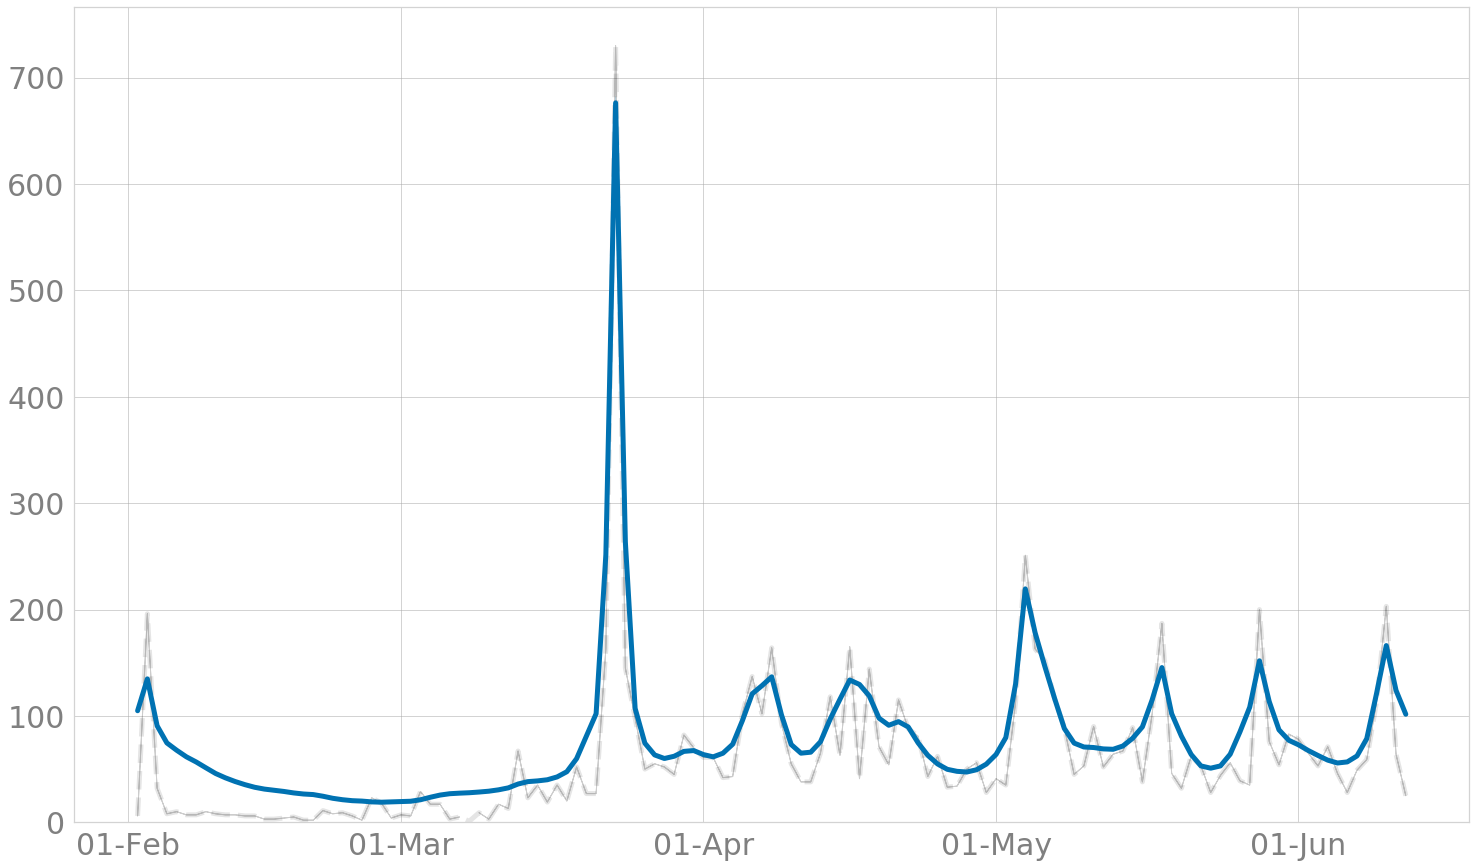

In [6]:
fig, ax1, palette = set_base_plot_settings(fontsize=30, if_palette = True)

ax1 = sns.lineplot(x="date", y="nr_of_tweets", 
                  color = palette[0], 
                   alpha = 0.10, linestyle = "dashed",
                     linewidth = 5, data = df)

ax1 = sns.lineplot(x="date", y="s200_nr_of_tweets", 
                  color = palette[5], 
                     linewidth = 5, data = df)

fig, ax1 = set_late_plot_settings(if_dates = True)

#plt.axvline(dt.datetime(2021, 1, 1), color=palette[6], linestyle = "dashdot")
#plt.text(x = dt.datetime(2021, 1, 2), 
# y = 10,
# s = '2021',
# color = palette[6])

#plt.axvline(dt.datetime(2020, 12, 27), color=palette[5])
#plt.text(x = dt.datetime(2020, 12, 28),
# y = freq_df[freq_df["date"] == "2020-12-27"]["nr_of_tweets"].reset_index(drop=True)[0], # y-coordinate position of data label, to take max height 
# s = 'First vaccinations',
# color = palette[5])

plot_name = "fig/coronapas_mentions_smooth.png"
fig.savefig(plot_name, dpi = 100, bbox_inches='tight')

fig.show()

In [7]:
dates = ["2020-12-21", "2020-12-27", 
         "2021-01-06", "2021-01-29",
        "2021-03-11", "2021-03-25", 
        "2021-04-14", 
        "2021-05-03"]
labels = ["Pfizer approved", "Vaccination start",
         "Moderna approved", "AstraZeneca approved",
         "AstraZeneca halted", "AstraZeneca further halted", 
        "AztraZeneca withdrawn",
         "J&J withdrawn"]

# coronapas specific
dates = ["2021-02-03",
         "2021-03-23",
    "2021-04-06","2021-04-16",
    "2021-05-18"]
labels = ["First mention",
          "Plan to return to normal",
    "Hairdressers reopen","Restaurants reopen",
    "Denmark's reopening plan"]

dates_df = df[df["date"].isin(dates)]

In [8]:
dates_df = dates_df.groupby("date").mean().reset_index()
dates_df["labels"] = labels
dates_df["date"] = pd.to_datetime(dates_df["date"])
dates_df["date1"] = pd.DatetimeIndex(dates_df.date) + pd.DateOffset(1)

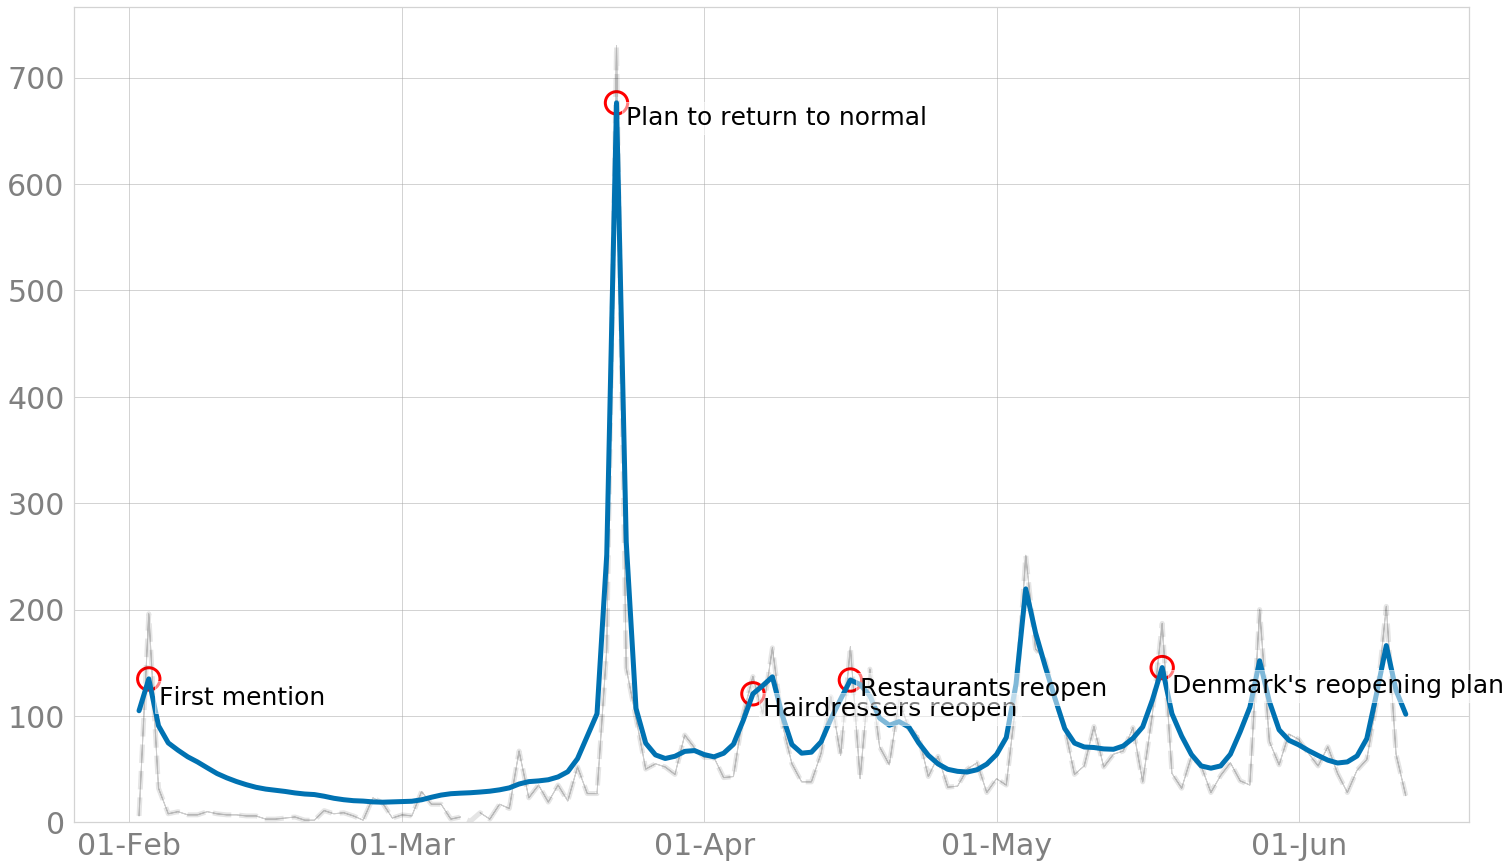

In [9]:
random.seed(1985)

fig, ax1, palette = set_base_plot_settings(fontsize=30, if_palette = True)

yaxis = "nr_of_tweets"
syaxis = "s200_nr_of_tweets"
xaxis = "date"

ax1 = sns.lineplot(x=xaxis, y=yaxis, 
                  color = palette[0], 
                   alpha = 0.10,
                   linestyle = "dashed",
                     linewidth = 5, data = df)

ax1 = sns.lineplot(x=xaxis, y=syaxis, 
                  color = palette[5], 
                     linewidth = 5, data = df)

x_coordinates = dates_df[xaxis]
y_coordinates = dates_df[syaxis]

plt.scatter(x_coordinates, y_coordinates, color="none", edgecolor="red",
           s = 500, linewidths = 3) 

for i in range(dates_df.shape[0]):
    plt.text(x = dates_df.date1[i], y = dates_df[syaxis][i]-random.randrange(15, 25, 3),  #20,
             s = dates_df.labels[i],
             fontdict = dict(color=palette[0],size=25),
             bbox = dict(facecolor="white",alpha=0.5))

#plt.axvline(dt.datetime(2021, 1, 1), color="grey")

fig, ax1 = set_late_plot_settings(if_dates = True)

plot_name = "fig/coronapas_mentions_dates.png"
fig.savefig(plot_name, dpi = 100, bbox_inches='tight')

fig.show()

# Hashtags

In [10]:
import re

def extract_hashtags(row):
    unique_hashtag_list = list(re.findall(r'#\S*\w', row["text"]))
    return unique_hashtag_list

def hashtag_per_row(data):
    # Create hashtags column with the actual unique hashtags
    data["hashtags"] = data.apply(lambda row: extract_hashtags(row), axis = 1)

    # Let's take a subset of necessary columns, add id
    df = data[["date", "hashtags"]].reset_index().rename(columns={"index": "id"})

    # Select only the ones where we have more than 1 hashtag per tweet
    df = df[df["hashtags"].map(len) > 1].reset_index(drop=True)

    # Hashtag per row
    # convert list of pd.Series then stack it
    df = (df
     .set_index(['date','id'])['hashtags']
     .apply(pd.Series)
     .stack()
     .reset_index()
     .drop('level_2', axis=1)
     .rename(columns={0:'hashtag'}))
    #lowercase!
    df["hashtag"] = df["hashtag"].str.lower()
    df["hashtag"] = df["hashtag"].str.replace("'.", "")
    df["hashtag"] = df["hashtag"].str.replace("’.", "")

    return df

hashtags = hashtag_per_row(df)

In [11]:
# Aggregate a frequency DF
def get_hashtag_frequencies(df):
    # Add freq of hashtags by themselves in the dataset
    tweet_freq = pd.DataFrame({'nr_of_hashtags' : df.groupby(['hashtag']).size()}).reset_index()
    return tweet_freq

In [12]:
freq_hashtags = get_hashtag_frequencies(hashtags)
df1 = freq_hashtags.sort_values(by=['nr_of_hashtags'], ascending=False)

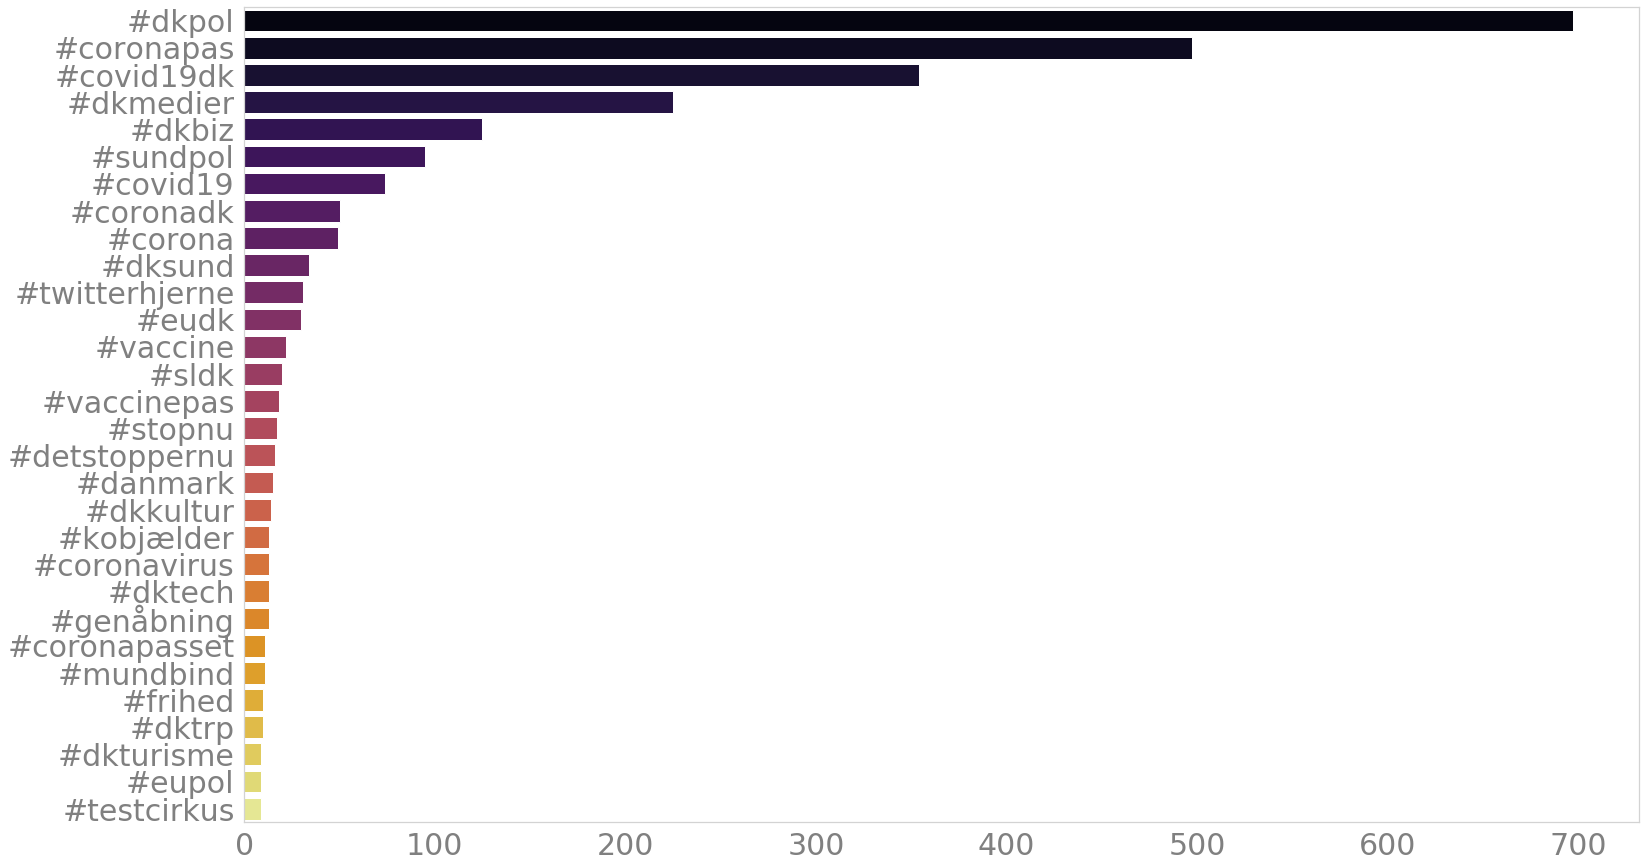

In [13]:
fig, ax1, palette = set_base_plot_settings(fontsize=30, if_palette = False)

df0 = df1.nlargest(30, columns=['nr_of_hashtags'])
nr_hash = len(df0["hashtag"].unique())

palette = sns.color_palette("inferno", nr_hash)

ax1 = sns.barplot(y="hashtag", x="nr_of_hashtags", 
                  palette = palette, 
                  data = df0)

fig, ax1 = set_late_barplot_settings()

plot_name = "fig/frequent_hashtags.png"
fig.savefig(plot_name, bbox_inches='tight')

## Wordcloud

In [14]:
import spacy
import string
from string import digits
import re
from spacy.lang.da import Danish

sp = spacy.load('da_core_news_lg')
nlp = Danish()
tokenizer = nlp.tokenizer

file = open("../hope-keyword-templates/src/stop_words.txt","r+")
stop_words = file.read().split()

# Tokenize and Lemmatize stop words
joint_stops = " ".join(stop_words)
tokenized = tokenizer(joint_stops).doc.text
stops = sp(tokenized)
my_stop_words = [t.lemma_ for t in stops]
my_stop_words = list(set(my_stop_words))

In [15]:
#df["tokens_list"] = df.mentioneless_text.apply(lemmatize_tweet)
#df["tokens_string"] = df.apply(lambda row: join_tokens(row), axis = 1)

#df = pd.read_csv("tokenized_lemmatized.csv", converters={"tokens_list": literal_eval}, dtype={"tokens_string": str})
texts = df["tokens_string"].dropna()

In [16]:
word_freq = df.tokens_string.str.split(expand=True).stack().value_counts()

In [17]:
word_freq = word_freq.to_frame().reset_index().rename(columns={"index": "word", 0: "Frequency"})

In [18]:
import string

texts = ", ".join(texts)
texts = texts.translate(str.maketrans('', '', string.punctuation))
texts = texts.lower()

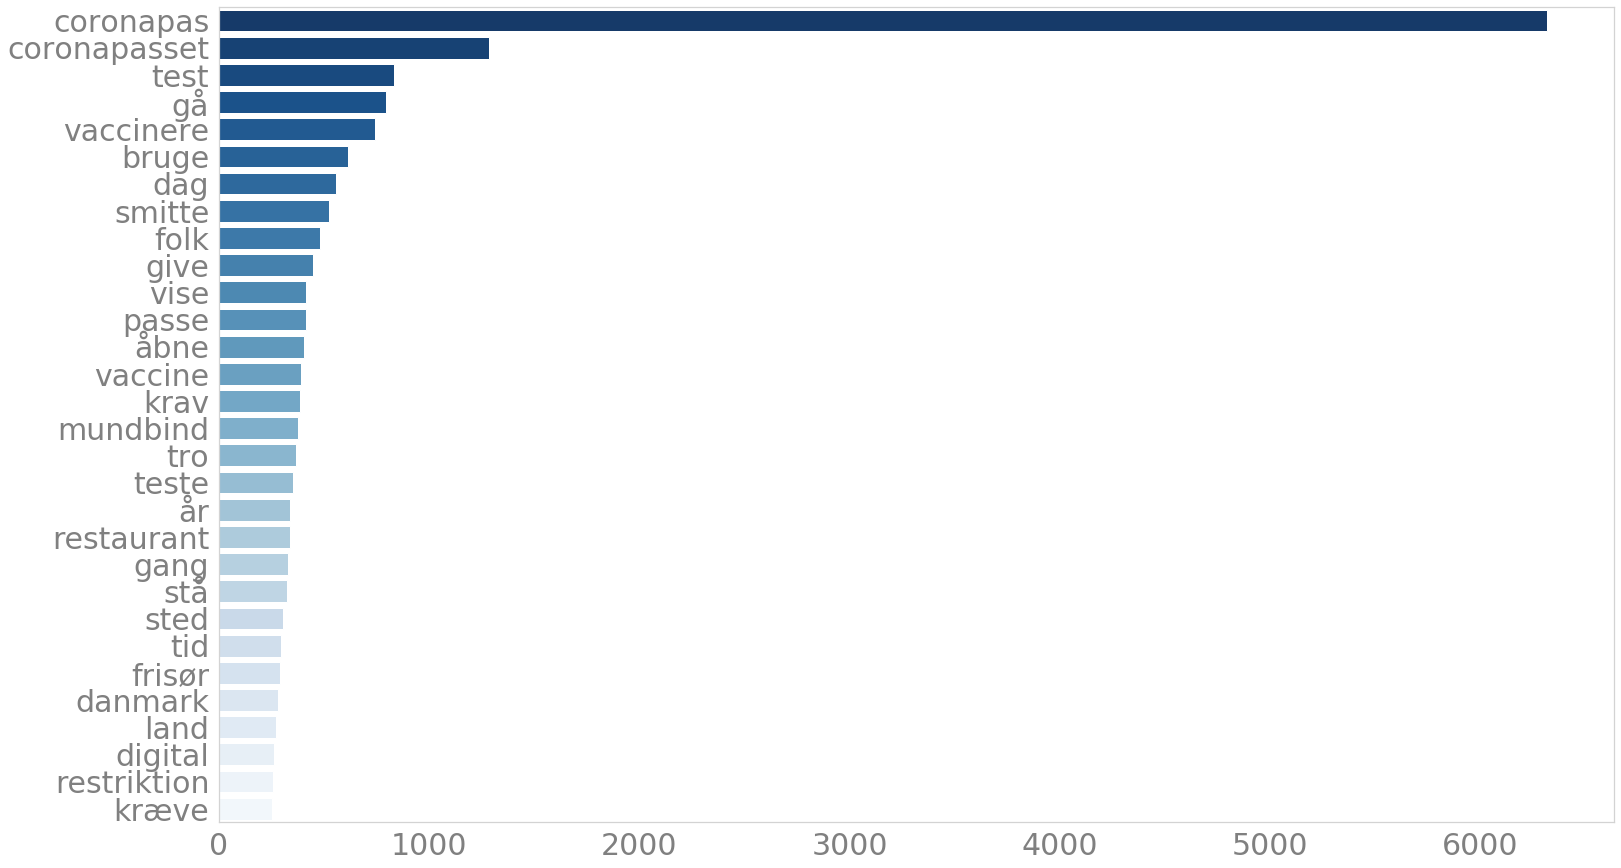

In [19]:
fig, ax1, palette = set_base_plot_settings(fontsize=30, if_palette = False)

word_freq = word_freq[~word_freq["word"].isin(my_stop_words)]
df0 = word_freq.nlargest(30, columns=['Frequency'])

ax1 = sns.barplot(y="word", x="Frequency", palette = "Blues_r", data = df0)

fig, ax1 = set_late_barplot_settings()

plot_name = "fig/word_frequency.png"
fig.savefig(plot_name, bbox_inches='tight')

## Word cloud

In [20]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    plot_name = "fig/word_cloud.png"
    plt.savefig(plot_name, dpi=150, bbox_inches='tight')

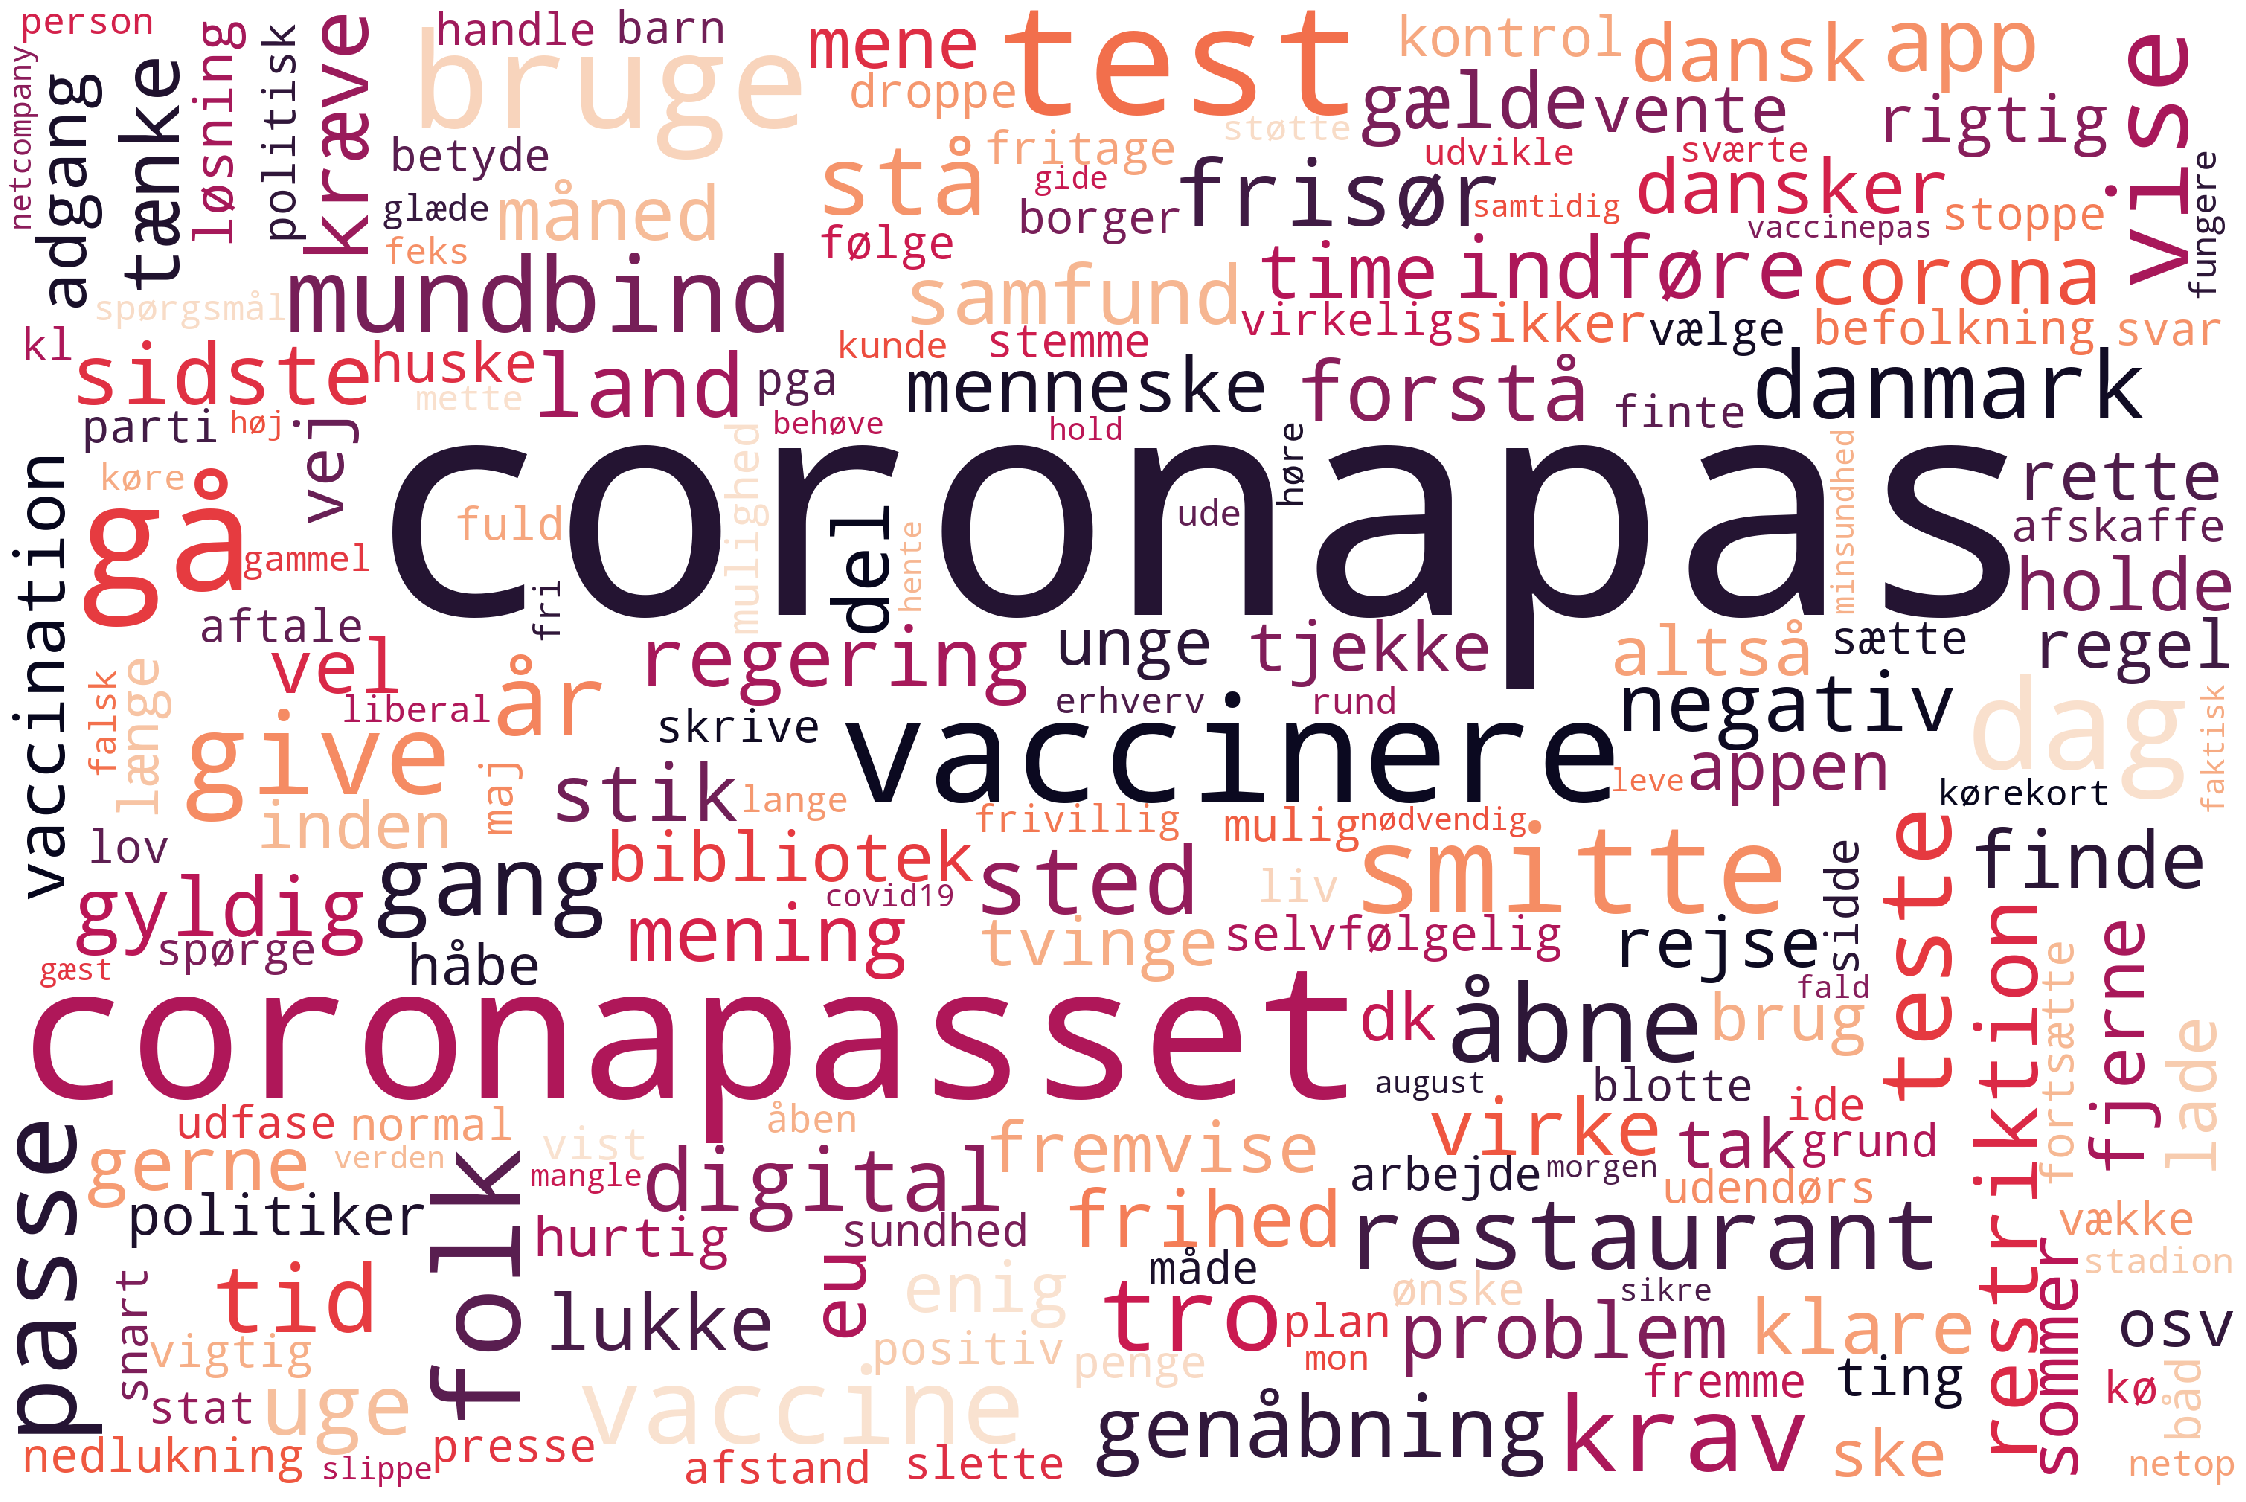

In [21]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', colormap="rocket", 
                      collocations=False, stopwords = stop_words).generate(texts)
# Plot
plot_cloud(wordcloud)

## Ngrams network plot

In [22]:
from nltk import bigrams
import itertools
import collections
import networkx as nx
import spacy
import nltk

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

#nlp = spacy.load("da_core_news_sm")

%matplotlib inline

In [23]:
def remove_spaces(tweet):
    tweet = [name for name in tweet if name.strip()]
    hmm = ['’','‘']
    tweet = [x for x in tweet if x not in hmm]
    return tweet

df["no_space"] = df.tokens_list.apply(remove_spaces)

In [24]:
#ic(type(df["no_space"][0]))
#ic(type(df["tokens_list"][0]))

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7988 entries, 120 to 8103
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               7988 non-null   int64         
 1   created_at          7988 non-null   object        
 2   id                  7988 non-null   float64       
 3   text                7988 non-null   object        
 4   search_keyword      7988 non-null   object        
 5   date                7988 non-null   datetime64[ns]
 6   mentioneless_text   7988 non-null   object        
 7   text50              7988 non-null   object        
 8   dupe50              7988 non-null   bool          
 9   neg                 7988 non-null   float64       
 10  neu                 7988 non-null   float64       
 11  pos                 7988 non-null   float64       
 12  compound            7988 non-null   float64       
 13  nr_of_tweets        7988 non-null   int64     

In [26]:
# Create list of lists containing bigrams in tweets
#terms_bigram = list(bigrams(wordlist))
#terms_bigram = [list(bigrams(tweet)) for tweet in df['tokens_list']]
terms_bigram = [list(bigrams(tweet)) for tweet in df['no_space']]

#terms_bigram = [list(bigrams(tweet)) for tweet in df['tokens_no_stop']]

# View bigrams for the first tweet
terms_bigram[0]

[('digital', 'coronapas'),
 ('coronapas', 'rettighed'),
 ('rettighed', 'tvungen'),
 ('tvungen', 'test'),
 ('test', '10'),
 ('10', 'år'),
 ('år', 'holde'),
 ('holde', 'time')]

In [27]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

In [28]:
bigram_df = pd.DataFrame(bigram_counts.most_common(30), columns=["bigram", "count"])

bigram_df

,bigram,count
0,"(krav, coronapas)",173
1,"(digital, coronapas)",160
2,"(vise, coronapas)",159
3,"(give, mening)",122
4,"(gyldig, coronapas)",121
5,"(kræve, coronapas)",120
6,"(negativ, test)",114
7,"(bruge, coronapas)",113
8,"(14, dag)",108
9,"(mundbind, coronapas)",103


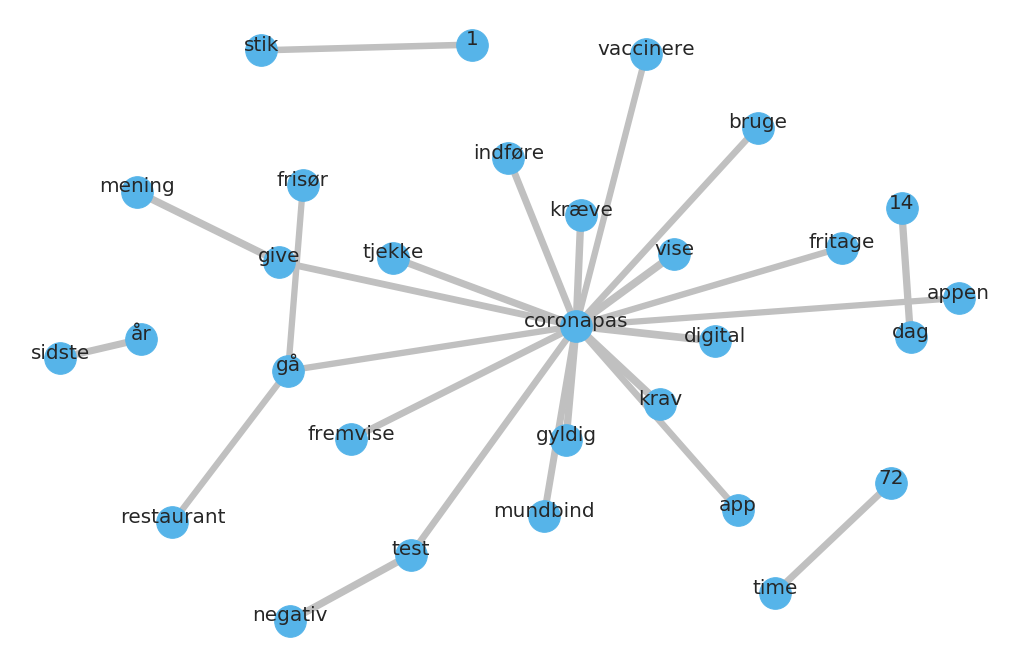

In [29]:
from math import log
seed = 123
random.seed(seed)
np.random.seed(seed)

palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

# Create dictionary of bigrams and their counts
d = bigram_df.set_index("bigram").T.to_dict("records")
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 5))

fig, ax = plt.subplots(figsize=(18, 12))

pos = nx.spring_layout(G, k=5)

weights = [G[u][v]['weight'] for u,v in G.edges()]
weights = [log(x)+1 for x in weights]

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=weights, # 3,
                 edge_color= "silver",
                 node_color= palette[2],
                 node_size = 1000,
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0], value[1]
    ax.text(x, y,
            s=key,
            #bbox=dict(facecolor= palette[2],
            #          alpha= 0.10),
            horizontalalignment='center', fontsize=20)
    

fig.patch.set_visible(False)
ax.axis('off')

plt.savefig("fig/bigram_graph.png", dpi=150, bbox_inches='tight')

plt.show()

In [46]:
def make_ngram_plot(bigram_df, prefix, kvalue):
    palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

    # Create dictionary of bigrams and their counts
    d = bigram_df.set_index("bigram").T.to_dict("records")
    # Create network plot 
    G = nx.Graph()

    # Create connections between nodes
    for k, v in d[0].items():
        G.add_edge(k[0], k[1], weight=(v * 5))

    fig, ax = plt.subplots(figsize=(18, 12))

    pos = nx.spring_layout(G, k=kvalue)

    weights = [G[u][v]['weight'] for u,v in G.edges()]
    weights = [log(x)+1 for x in weights]

    # Plot networks
    nx.draw_networkx(G, pos,
                     font_size=10,
                     width=weights, # 3,
                     edge_color= "silver",
                     node_color= palette[2],
                     node_size = 1000,
                     with_labels = False,
                     ax=ax)

    # Create offset labels
    for key, value in pos.items():
        x, y = value[0], value[1]
        ax.text(x, y,
                s=key,
                #bbox=dict(facecolor= palette[2],
                #          alpha= 0.10),
                horizontalalignment='center', fontsize=20)


    fig.patch.set_visible(False)
    ax.axis('off')
    
    filename = "fig/bigram_graph_" + str(prefix) + ".png"
    plt.savefig(filename, dpi=150, bbox_inches='tight')

## Monthly ngrams

In [47]:
df["month"] = pd.DatetimeIndex(df['date']).month

2
3
4
5
6


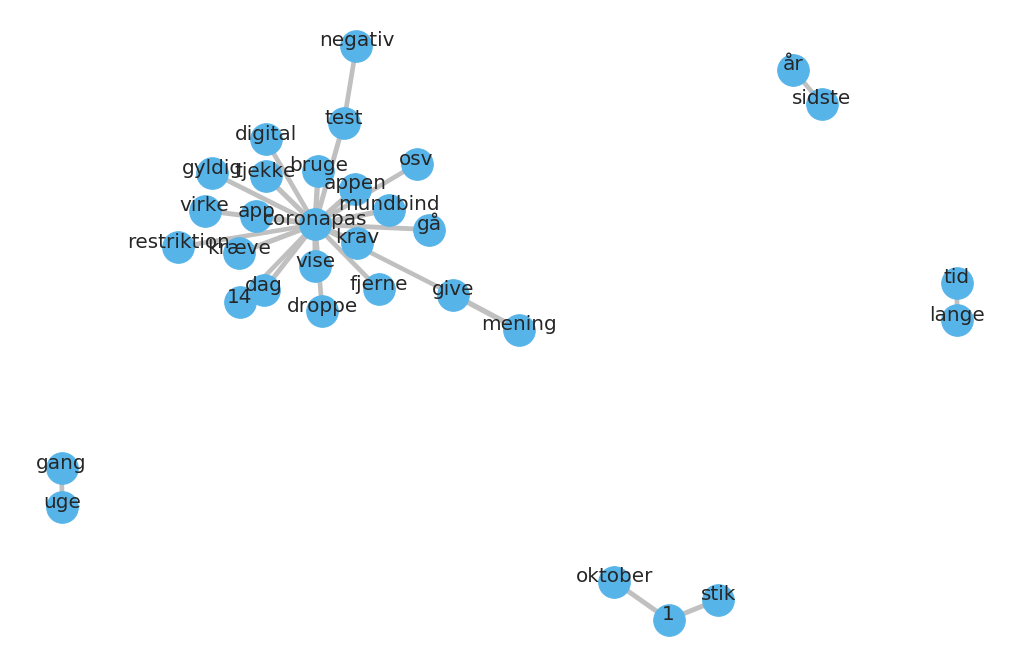

In [54]:
kvalues = [1,2,2,5,2]
i = 0
for month in df["month"].unique():
    from nltk import bigrams
    import itertools
    import collections
    import networkx as nx
    import spacy
    import nltk

    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")

    import warnings 
    warnings.filterwarnings("ignore", category=DeprecationWarning)

    #nlp = spacy.load("da_core_news_sm")

    %matplotlib inline
    
    print(month)
    dff = df[df["month"] == month]
    terms_bigram = [list(bigrams(tweet)) for tweet in dff['no_space']]
    # Flatten list of bigrams in clean tweets
    bigrams = list(itertools.chain(*terms_bigram))

    # Create counter of words in clean bigrams
    bigram_counts = collections.Counter(bigrams)
    bigram_df = pd.DataFrame(bigram_counts.most_common(30), columns=["bigram", "count"])
    
    make_ngram_plot(bigram_df, month, kvalues[i])
    i != 1